In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [276]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
y_actual = pd.read_csv('/content/gender_submission.csv')

Performing EDA

In [277]:
# Combining y_actual and test
test['Survived'] = y_actual['Survived']

In [278]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [279]:
train.drop(['Cabin','Name','Ticket', 'PassengerId'],axis=1 , inplace=True)
test.drop(['Cabin','Name','Ticket','PassengerId'],axis=1 , inplace=True)

In [280]:
train.isnull().sum()
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Survived     0
dtype: int64

In [281]:
train.dropna(inplace=True)
test.dropna(inplace=True)
test.shape

(331, 8)

In [282]:
test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,1
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,1


In [283]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# VISUALIZATION

<ipython-input-284-0936dc03175d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

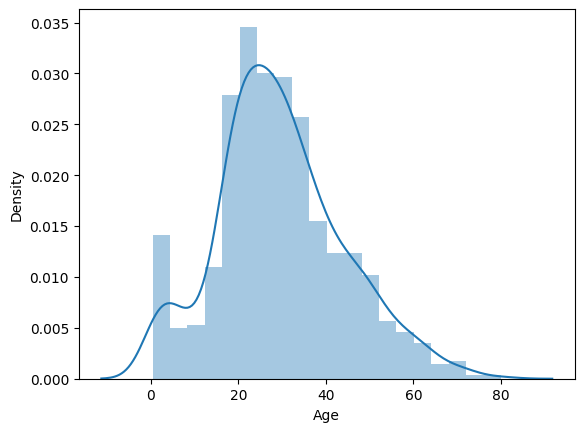

In [284]:
# Visualizing Skewed data
sns.distplot(train['Age'])

<ipython-input-285-58821fb3cdbe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

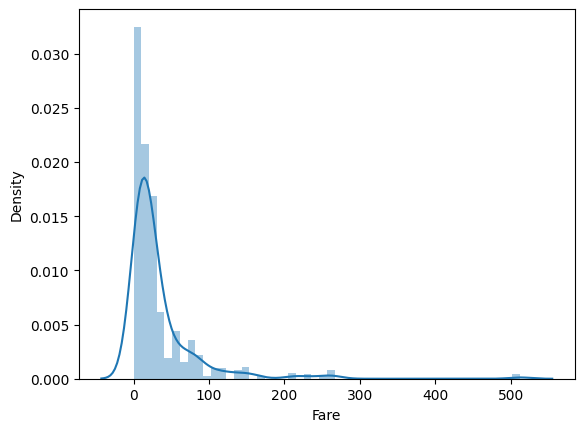

In [285]:
# Visualizing Fare values
sns.distplot(train['Fare'])

<Axes: xlabel='Survived', ylabel='Fare'>

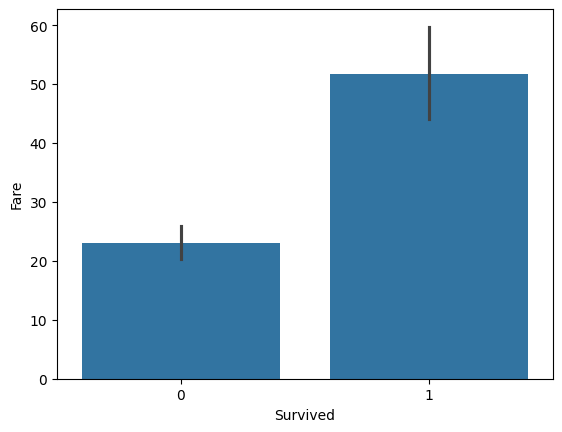

In [286]:
# Visualizing Fare vs Survival
sns.barplot(x='Survived',y='Fare',data=train)

Data Visualization

<Axes: xlabel='Survived', ylabel='count'>

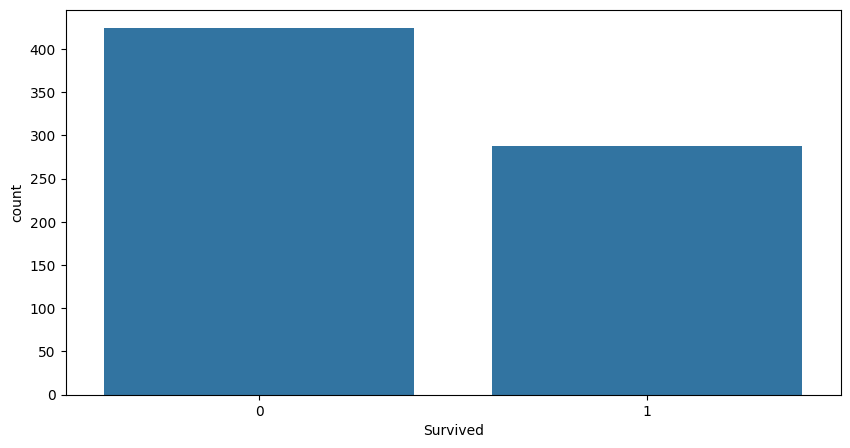

In [287]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

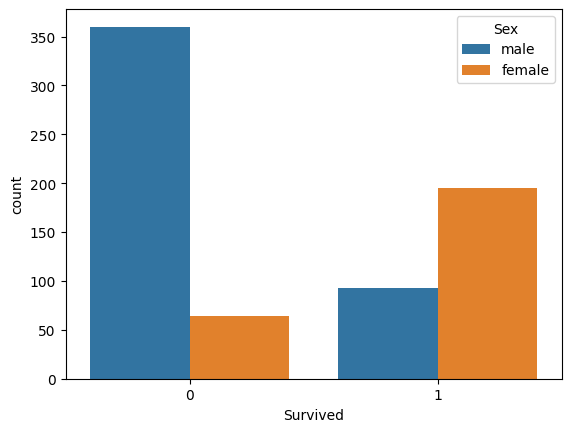

In [288]:
sns.countplot(x='Survived',hue='Sex',data=train)

<Axes: xlabel='Pclass', ylabel='Survived'>

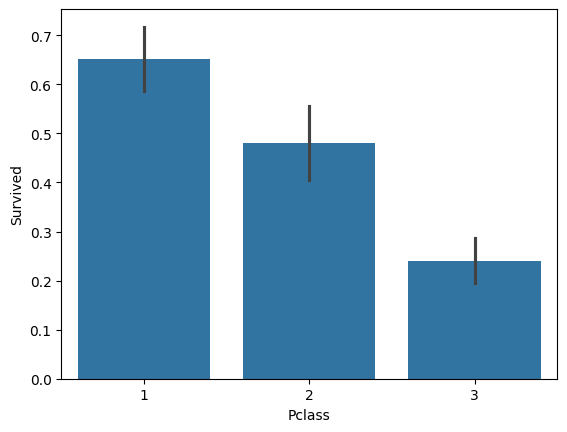

In [289]:
# Bar Graphs
sns.barplot(x='Pclass',y='Survived',data=train)

<Axes: xlabel='Age', ylabel='Survived'>

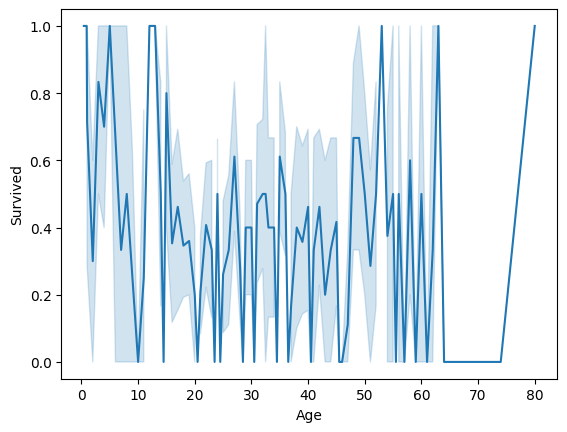

In [290]:
# Line Plots
sns.lineplot(x='Age',y='Survived',data=train)


One Hot Encoding Categorical Values


In [291]:
train['Embarked'].unique()


array(['S', 'C', 'Q'], dtype=object)

In [292]:
train = pd.get_dummies(train,columns=['Sex','Embarked'])
test = pd.get_dummies(test,columns=['Sex','Embarked'])

In [293]:
X, y = train.drop('Survived',axis=1),train['Survived']

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

# Logistic Regression

In [295]:
# Logistic Regression with l1 and for binary classification
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [296]:
# Model Evaluation
y_pred = model.predict(X_test)

In [297]:
hist = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
hist.head(10)

,Actual,Predicted
279,1,0
268,1,1
668,0,0
208,1,1
0,0,0
41,0,1
327,1,1
508,0,0
407,1,0
37,0,0


In [298]:
# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8041958041958042
[[74 16]
 [12 41]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        90
           1       0.72      0.77      0.75        53

    accuracy                           0.80       143
   macro avg       0.79      0.80      0.79       143
weighted avg       0.81      0.80      0.81       143



In [299]:
test

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,False,True,False,True,False
1,3,47.0,1,0,7.0000,1,True,False,False,False,True
2,2,62.0,0,0,9.6875,0,False,True,False,True,False
3,3,27.0,0,0,8.6625,0,False,True,False,False,True
4,3,22.0,1,1,12.2875,1,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
409,3,3.0,1,1,13.7750,1,True,False,False,False,True
411,1,37.0,1,0,90.0000,1,True,False,False,True,False
412,3,28.0,0,0,7.7750,1,True,False,False,False,True
414,1,39.0,0,0,108.9000,1,True,False,True,False,False


In [301]:
# Predicting Test dataset

X_act = test.drop('Survived',axis = 1)
y_act = test['Survived']
test_pred = model.predict(X_act)

In [305]:
# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_act,test_pred))
print(confusion_matrix(y_act,test_pred))
print(classification_report(y_act,test_pred))

0.9244712990936556
[[187  17]
 [  8 119]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       204
           1       0.88      0.94      0.90       127

    accuracy                           0.92       331
   macro avg       0.92      0.93      0.92       331
weighted avg       0.93      0.92      0.92       331



In [308]:
# Mean Square Error And Mean Absolute Error
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Mean Squared Error : ",mean_squared_error(y_act,test_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_act,test_pred))

Mean Squared Error :  0.0755287009063444
Mean Absolute Error :  0.0755287009063444
